# Python w analizie ekonomicznej - poziom zaawansowany, warsztaty
## Temat: Pandas - część 2.

(odpowiedzi do zadań w czasie prezentacji proszę udzielać na czacie)

Jakub Tomczak *jakub.tomczak@cdv.pl*

Agenda:

    * Usuwanie wartości brakujących
    * Zastępowanie wartości brakujących
    * Funkcja map
    * Funkcja groupby
    * Łączenie zbiorów danych
    * Szeregi czasowe - operacje z datami

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Wczytywanie danych - wczytujemy plik `cars.csv`, ten sam, który był używany na ostatnich zajęciach.

In [89]:
def load_dataset(filename):
    return pd.read_csv(f'files/{filename}.csv', sep=';')
dataset = load_dataset('cars')
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36


## Wartości brakujące w danych

Często w rzeczywistych zbiorach danych mamy do czynienia z brakującymi danymi. Ich pchodzenie może byc bardzo zróżnicowane - od błędu czujników zbierających dane po błędy ludzkie podczas tworzenia zbiorów danych. Jednakże algorytmy wykorzystywane w uczeniu maszynowym, które dokonują predykcji lub klasyfikacji danych zazwyczaj nie radzą sobie z brakującymi danymi (chociaż sa wyjątki). W takiej sytuacji musimy coś zrobić z brakującymi wartościami. Istnieje wiele strategii, które możemy wykorzystać w takiej sytuacji.

### Wartości brakujące w danych - strategie radzenia sobie z nimi
Strategie radzenia sobie z brakującymi danymi:
    * nie robienie niczego
    * usunięcie obserwacji z brakującymi danymi
    * dodanie sztucznych wartości
    * zastąpienie brakujących wartości medianą
    * zastąpienie brakujących wartości średnią
    * zbudowanie modelu, który przewiduje poprawne wartości
    * inne ...

Dzisiaj wykorzystamy pandas do usunięcia brakujących danych lub do zastąpienia ich medianą.

### Identyfikacja 

Wartości brakujące możemy znaleźć za pomocą metody `isna()`.

In [33]:
dataset = load_dataset('cars')
null_values_matrix = dataset.isna().values
null_values_matrix


array([[False, False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [34]:
dataset[null_values_matrix]

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
11,12,citroen,NaN,dostawczy,2017,48 780,0,10-05-2020 08:40
12,13,man,NaN,ciężarowy,2004,22 000,1,13-05-2020 10:15


Uwaga na taką metodę sprawdzania wartości pustych

In [63]:
dataset.model == np.nan

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: model, dtype: bool

dla porównania

In [61]:
dataset.model.isna()

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13    False
Name: model, dtype: bool

wszystkie wartości są `False` mimo, iż w tej kolumnie występują wartości puste. Dlaczego się tak dzieje?

In [56]:
np.nan == np.nan

False

Jak widać wartości `nan` (not a number) nie są porównywalne, stąd zawsze otrzymujemy wartość `False`.

### Różna reprezentacja wartości brakujących

Czasami wartości brakujące są reprezentowane przez specyficzne wartości. Może to być np. ciąg `nd`.

Załadujemy teraz plik `cars_1.csv`, który ma wartości brakujące w kolumnie `typ samochodu`.

In [36]:
dataset = load_dataset('cars_1')
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54
6,7,audi,a4,osobowy,2008,38 000,0,22-04-2020 01:12
7,8,volkswagen,golf,nd,2005,12 900,1,11-05-2020 15:48
8,9,mercedes-benz,klasa s 500,osobowy,2001,41 900,0,30-04-2020 14:52
9,10,renault,master,dostawczy,2016,37 314,0,13-04-2020 11:11


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   id                                 14 non-null     int64 
 1   marka                              14 non-null     object
 2   model                              11 non-null     object
 3   typ samochodu                      14 non-null     object
 4   rocznik                            14 non-null     int64 
 5   cena                               14 non-null     object
 6   powypadkowy                        14 non-null     int64 
 7   data i godzina dodania ogłoszenia  14 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.0+ KB


Wartości brakujące są oznaczone jako ciąg znaków `nd` - możemy je zamienić na wartości `NaN` (z biblioteki `numpy`) w taki sposób

In [53]:
dataset = dataset.replace('nd', np.nan)
dataset[dataset.isna().values]

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36
5,6,NaN,octavia,osobowy,2014.0,22 000,0,21-04-2020 11:54
7,8,volkswagen,golf,NaN,2005.0,12 900,1,11-05-2020 15:48
10,11,volkswagen,craft,NaN,NaN,6 900,0,20-05-2020 10:19
10,11,volkswagen,craft,NaN,NaN,6 900,0,20-05-2020 10:19
11,12,NaN,NaN,dostawczy,2017.0,48 780,0,10-05-2020 08:40
11,12,NaN,NaN,dostawczy,2017.0,48 780,0,10-05-2020 08:40
12,13,man,NaN,ciężarowy,2004.0,22 000,1,13-05-2020 10:15


dlaczego w ogóle zamieniamy wartości `nd` na `NaN` - chociażby dlatego żeby łatwo zastępować brakujące wartości za pomocą funkcji `fillna()`.

#### Inny sposób zamiany wartości na `NaN` - poprzez wskazanie tych wartości podczas ładowania pliku

Funkcja `read_csv` jako jeden z parametrów przyjmuje argument `na_values`

In [88]:
dataset = pd.read_csv('files/cars_1.csv', sep=';', na_values=['nd'])
dataset['typ samochodu']

0       osobowy
1       osobowy
2       osobowy
3       osobowy
4       osobowy
5       osobowy
6       osobowy
7           NaN
8       osobowy
9     dostawczy
10          NaN
11    dostawczy
12    ciężarowy
13          NaN
Name: typ samochodu, dtype: object

A co z pustymi wartościami?

In [47]:
dataset = load_dataset('cars_2')
dataset

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36
5,6,NaN,octavia,osobowy,2014.0,22 000,0,21-04-2020 11:54
6,7,audi,a4,osobowy,2008.0,38 000,0,22-04-2020 01:12
7,8,volkswagen,golf,nd,2005.0,12 900,1,11-05-2020 15:48
8,9,mercedes-benz,klasa s 500,osobowy,2001.0,41 900,0,30-04-2020 14:52
9,10,renault,master,dostawczy,2016.0,37 314,0,13-04-2020 11:11


Wszystkie wartości puste - z kolumn `marka` oraz `rocznik` zostały zastąpione wartością `NaN`. Mimo tego typ danych kolumny `typ samochodu` jest poprawnie rozpoznany - `float64`.

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 14 non-null     int64  
 1   marka                              12 non-null     object 
 2   model                              11 non-null     object 
 3   typ samochodu                      14 non-null     object 
 4   rocznik                            11 non-null     float64
 5   cena                               14 non-null     object 
 6   powypadkowy                        14 non-null     int64  
 7   data i godzina dodania ogłoszenia  14 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ KB


Pomimo, iż kolumna `rocznik` posiada brakujące wartości to i tak możemy w niej policzyć średnią. Z jednej strony jest to wygodne, bo nie powoduje błędu, z drugiej strony możemy się nie zorientować, że liczymy średnią która nie jest liczona na wszystkich elementach (podczas, gdy do dalszych obliczeń zakładamy, że liczba składników w średniej była równa liczbie wszystkich obserwacji).

In [51]:
dataset.rocznik.mean()

2011.5454545454545

### Usuwanie obserwacji z wartościami brakującymi

Usuwanie wierszy, w których występuje chociaż jedna brakująca wartość. W tym celu możemy wykorzystać metodę `dropna()`.

In [85]:
dataset = load_dataset('cars')
dataset = dataset.dropna()
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54


Korzystając z metody `drop`. Tym razem jako pierwszy argument metody `drop` podajemy wiersze z danymi, a właściwie ich indeksy, wykorzystujący atrybut ramki danych - `index`.

In [83]:
dataset = load_dataset('cars')

missing_data_rows = dataset.loc[dataset.model.isna()]
# tym razem nie musimy podawać argumentu axis ponieważ wartość axis=0 jest domyślna (0 odpowiada usuwaniu wierszy)
dataset = dataset.drop(missing_data_rows.index)
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2010,20500,0,20-05-2020 14:20
2,3,opel,adam,osobowy,2018,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2007,8 900,1,14-05-2020 09:36
5,6,skoda,octavia,osobowy,2014,22 000,0,21-04-2020 11:54


po czym resetujemy indeksy w ramce danych, by nie mieć problemów z metodą `loc`

In [82]:
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36


## Zastępowanie wartością - robiliśmy to na poprzednich zajęciach

Aby zastąpić brakujące wartości możemy wykorzystać metodę `fillna()`.

In [94]:
# wczytujemy na nowo zbiór cars_2.csv
dataset = load_dataset('cars_2')
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36


In [100]:
# używamy inplace, ponieważ nie możemy przypisać wyniku zamiany wartości NaN do dataset
# w takim przypadku zamienilibyśmy ramkę danych na kolumnę model
# dataset = dataset.model.fillna('brak danych')
dataset.model.fillna('brak danych', inplace=True)
dataset

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,brak danych,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36
5,6,NaN,octavia,osobowy,2014.0,22 000,0,21-04-2020 11:54
6,7,audi,a4,osobowy,2008.0,38 000,0,22-04-2020 01:12
7,8,volkswagen,golf,nd,2005.0,12 900,1,11-05-2020 15:48
8,9,mercedes-benz,klasa s 500,osobowy,2001.0,41 900,0,30-04-2020 14:52
9,10,renault,master,dostawczy,2016.0,37 314,0,13-04-2020 11:11


Dla wartości liczbowych najczęściej zastępuje się brakujące wartości medianą lub wartością średnią

In [108]:
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,NaN,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,NaN,8 900,1,14-05-2020 09:36


In [109]:
dataset.rocznik.median()

2014.0

In [110]:
dataset.rocznik.fillna(dataset.rocznik.median(), inplace=True)
dataset.head()

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,1,ford,focus,osobowy,2014.0,20500,0,20-05-2020 14:20
1,2,opel,NaN,osobowy,2014.0,13 000,0,19-05-2020 10:21
2,3,opel,adam,osobowy,2018.0,35 000,0,11-05-2020 13:21
3,4,opel,corsa,osobowy,2014.0,13 000,1,19-05-2020 08:21
4,5,opel,astra,osobowy,2014.0,8 900,1,14-05-2020 09:36


## Funkcja map

Funkcja [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) jest wywoływana na danej kolumnie. Jako pierwszy argument musimy podać funkcję przyjmującą jeden argument, nazwiemy go funkcją mapującą. Argumentem przekazywanym do funkcji mapującej jest każdy kolejny element z podanej kolumny. Funkcja mapująca powinna zwracać jakąś wartość. Należy pamiętać, że cała funkcja `map` zwraca serię danych - kolumnę. Nie działa ona w miejscu, co oznacza, że wynik funkcji `map` musimy przypisać do odpowiedniej kolumny ramki danych. 

In [495]:
dataset.head()

,marka,model,typ samochodu,rocznik,cena,powypadkowy
data i godzina dodania ogłoszenia,,,,,,
2020-05-20 14:20:00,ford,focus,osobowy,2010,20500,0
2020-05-19 10:21:00,opel,brak danych,osobowy,2014,13000,0
2020-05-11 13:21:00,opel,adam,osobowy,2018,35000,0
2020-05-19 08:21:00,opel,corsa,osobowy,2014,13000,1
2020-05-14 09:36:00,opel,astra,osobowy,2007,8900,1


In [498]:
dataset.cena.map(lambda x: x+1000).head()

data i godzina dodania ogłoszenia
2020-05-20 14:20:00    21500
2020-05-19 10:21:00    14000
2020-05-11 13:21:00    36000
2020-05-19 08:21:00    14000
2020-05-14 09:36:00     9900
Name: cena, dtype: int64

In [497]:
dataset.head()

,marka,model,typ samochodu,rocznik,cena,powypadkowy
data i godzina dodania ogłoszenia,,,,,,
2020-05-20 14:20:00,ford,focus,osobowy,2010,20500,0
2020-05-19 10:21:00,opel,brak danych,osobowy,2014,13000,0
2020-05-11 13:21:00,opel,adam,osobowy,2018,35000,0
2020-05-19 08:21:00,opel,corsa,osobowy,2014,13000,1
2020-05-14 09:36:00,opel,astra,osobowy,2007,8900,1


In [500]:
dataset.loc[:, 'cena'] = dataset.cena.map(lambda x: x+1000)
dataset.cena

data i godzina dodania ogłoszenia
2020-05-20 14:20:00     22500
2020-05-19 10:21:00     15000
2020-05-11 13:21:00     37000
2020-05-19 08:21:00     15000
2020-05-14 09:36:00     10900
2020-04-21 11:54:00     24000
2020-04-22 01:12:00     40000
2020-05-11 15:48:00     14900
2020-04-30 14:52:00     43900
2020-04-13 11:11:00     39314
2020-05-20 10:19:00      8900
2020-05-10 08:40:00     50780
2020-05-13 10:15:00     24000
2020-05-26 11:45:00    144000
Name: cena, dtype: int64

## Grupowanie danych

Często potrzeba agregować dane według danej kolumny. W naszym przypadku moglibyśmy sprawdzić jaka jest średnia cena każdego typu pojazdu. W pandas w celu grupowania danych korzystamy z metody [`groupby`](), która jako pierwszy argument przyjmuje nazwę/listę nazw kolumn, po których chcemy agregować dane.

Ładujemy dane dotyczące pojazdów, które już są przetworzone metodami z poprzednich zajęć

In [118]:
dataset = load_dataset('cars_processed')
dataset.head()

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00
1,opel,brak danych,osobowy,2014,13000,0,2020-05-19 10:21:00
2,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00
3,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00
4,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00


In [120]:
dataset.groupby('typ samochodu').cena.mean()

typ samochodu
ciężarowy    82000
dostawczy    30998
osobowy      22800
Name: cena, dtype: int64

Możemy również grupować według kilku kolumn na raz - tak więc możemy poznać średnią cenę ze względu na typ pojazdu w danym roku.

In [122]:
dataset.groupby(['typ samochodu', 'rocznik']).mean()

cena  powypadkowy
typ samochodu rocznik                       
ciężarowy     2004      22000.0     1.000000
              2016     142000.0     0.000000
dostawczy     2003       6900.0     0.000000
              2016      37314.0     0.000000
              2017      48780.0     0.000000
osobowy       2001      41900.0     0.000000
              2005      12900.0     1.000000
              2007       8900.0     1.000000
              2008      38000.0     0.000000
              2010      20500.0     0.000000
              2014      16000.0     0.333333
              2018      35000.0     0.000000

In [ ]:
Po wywołaniu metody `groupby` powstaje obiekt typu `DataFrameGroupBy` na którym możemy wykonywać różne operacje

In [129]:
groupped = dataset.groupby(['typ samochodu', 'rocznik'])

Metoda `groupby` nie wykonuje żadnej operacji, działa ona w sposób leniwy (`lazy`), co oznacza, że samo grupowanie wykonuje się dopiero kiedy podamy operacje ("powiemy pandasowi co chcemy robić"), które mają być wykonane na zgrupowanych danych. Bez podania operacji `mean` z powyższego przykładu metoda `groupby` nic nie robi - tworzy tylko obiekt `DataFrameGroupBy`. Świadomość takiego działania pandas jest potrzebna szczególnie, gdy operujemy na dużych zbiorach danych.

Z metodą `groupby` związany jest proces złożony z potencjalnie wielu kroków, które można zawrzeć w 3 operacjach:
   * <b>split</b> - rozbijanie danych na podstawie kryteriów
   * <b>apply</b> - stosowanie operacji na tych rozbitych danych
   * <b>combine</b> - składanie wyników operacji wykonanych na rozbitych danych

Operacje które mogą być wykonywane na danych w drugim kroku (<b>apply</b>) są następujące:
   * <b>agregacja</b>, czyli na przykład obliczanie sumy, średniej, liczby wystąpień...
   * <b>transformacja</b>, czyli wykonywanie operacji na danych w grupie takich jak normalizacja danych (mając wartości liczbowe w jakimś zakresie np. <346; 2028> przestawiamy je do zakresu <0;1>)
   * <b>filtrowanie</b> które może pominąć pewne grupy ze względu na jakieś kryteria (np. pominięcie grupy, która miała zbyt małą liczba obserwacji)

Jeżeli chcemy wymusić działanie metody `groupby` możemy użyć pętlę `for`. Dzięki temu możemy 'iterować' (przechodzić) po kolejnych wynikach działania funkcji `groupby`. To możliwe dzięki temu, że obiekt `DataFrameGroupBy` jest generatorem (pierwsze zajęcia).


In [137]:
for group, data in groupped:
    print(group)

('ciężarowy', 2004)
('ciężarowy', 2016)
('dostawczy', 2003)
('dostawczy', 2016)
('dostawczy', 2017)
('osobowy', 2001)
('osobowy', 2005)
('osobowy', 2007)
('osobowy', 2008)
('osobowy', 2010)
('osobowy', 2014)
('osobowy', 2018)


#### Agregacja

In [447]:
groupped.mean()

cena  powypadkowy
typ samochodu rocznik                       
ciężarowy     2004      22000.0     1.000000
              2016     142000.0     0.000000
dostawczy     2003       6900.0     0.000000
              2016      37314.0     0.000000
              2017      48780.0     0.000000
osobowy       2001      41900.0     0.000000
              2005      12900.0     1.000000
              2007       8900.0     1.000000
              2008      38000.0     0.000000
              2010      20500.0     0.000000
              2014      16000.0     0.333333
              2018      35000.0     0.000000

#### Transformacja

Standaryzacja danych zgrupowanych. Standaryzacja danych pomaga w poprawie trafności predykcji/klasyfikacji niektórych algorytmów uczenia maszynowego.

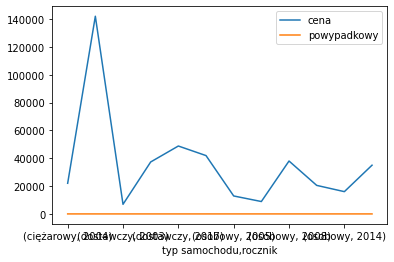

In [482]:
groupped.mean().plot()

Wykonujemy standaryzację

In [521]:
groupped_standard = groupped.mean().transform(lambda x: (x - x.mean())/x.std())
groupped_standard

cena  powypadkowy
typ samochodu rocznik                       
ciężarowy     2004    -0.382891     1.620403
              2016     2.934693    -0.623232
dostawczy     2003    -0.800353    -0.623232
              2016     0.040488    -0.623232
              2017     0.357484    -0.623232
osobowy       2001     0.167275    -0.623232
              2005    -0.634474     1.620403
              2007    -0.745060     1.620403
              2008     0.059454    -0.623232
              2010    -0.424360    -0.623232
              2014    -0.548770     0.124646
              2018    -0.023486    -0.623232

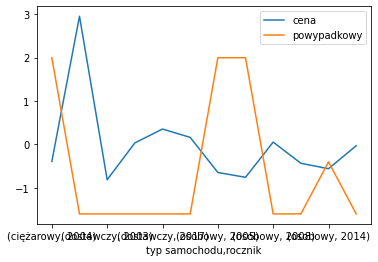

In [481]:
groupped_standard.plot()

## Łączenie tabel

Pandas w bardzo prosty sposób pozwala na łączenie kilku plików powiązanych relacjami na połączenie ze sobą.
Do tej operacji wykorzystujemy metodę [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) lub [`join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), która ostatecznie i tak korzysta z metody `merge`.

Na początku załadujemy pliku `cars_details`, który zawiera szczegóły dotyczące pojazdów.

In [171]:
cars_details = load_dataset('cars_details')
cars_details

,model,marka,moc,prędkość max
0,craft,volkswagen,170,200
1,focus,ford,122,190
2,a4,audi,190,240
3,golf,volkswagen,210,250
4,octavia,skoda,180,240
5,bmw,m5,400,300
6,astra,opel,180,210
7,xf 460,daf,400,170
8,adam,opel,145,210
9,corsa,opel,112,190


In [172]:
dataset

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00
1,opel,brak danych,osobowy,2014,13000,0,2020-05-19 10:21:00
2,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00
3,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00
4,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00
5,skoda,octavia,osobowy,2014,22000,0,2020-04-21 11:54:00
6,audi,a4,osobowy,2008,38000,0,2020-04-22 01:12:00
7,volkswagen,golf,osobowy,2005,12900,1,2020-05-11 15:48:00
8,mercedes-benz,klasa s 500,osobowy,2001,41900,0,2020-04-30 14:52:00
9,renault,master,dostawczy,2016,37314,0,2020-04-13 11:11:00


Porównując oba zbiory widzimy, że nie wszystkie pojazdy z ogłoszenia mają swoje odpowiedniki w tabeli ze szczegółami pojazdów.

Jako, że metoda `join` sprowadza się do metody `merge`, w przykładach zostanie użyta metoda `merge`.

In [173]:
dataset.merge(cars_details)

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,moc,prędkość max
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00,122,190
1,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00,145,210
2,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00,112,190
3,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00,180,210
4,skoda,octavia,osobowy,2014,22000,0,2020-04-21 11:54:00,180,240
5,audi,a4,osobowy,2008,38000,0,2020-04-22 01:12:00,190,240
6,volkswagen,golf,osobowy,2005,12900,1,2020-05-11 15:48:00,210,250
7,renault,master,dostawczy,2016,37314,0,2020-04-13 11:11:00,150,200
8,volkswagen,craft,dostawczy,2003,6900,0,2020-05-20 10:19:00,170,200
9,daf,xf 460,ciężarowy,2016,142000,0,2020-05-26 11:45:00,400,170


In [174]:
cars_details

,model,marka,moc,prędkość max
0,craft,volkswagen,170,200
1,focus,ford,122,190
2,a4,audi,190,240
3,golf,volkswagen,210,250
4,octavia,skoda,180,240
5,bmw,m5,400,300
6,astra,opel,180,210
7,xf 460,daf,400,170
8,adam,opel,145,210
9,corsa,opel,112,190


Jak widzimy szczegóły pojazdów zostały poprawnie połączone. Nie musieliśmy podawać żadnych danych opisujących, które kolumny z obu tabel sobie odpowiadają. Stało się tak ponieważ `pandas` 'zauważył', że obie tabele mają takie same nazwy kolumn. 

Zauważmy także, że ogłoszenia, w których w nazwie modelu było 'brak danych' zostały pominięte - mamy tylko 9 rekordów zamiast 13.

Pobierzmy teraz zbiór `cars_details2.csv` ze szzegółami technicznymi pojazdów, w których tytuły kolumn nie odpowiadają tym w zbiorze z ogłoszeniami.

In [175]:
cars_details = load_dataset('cars_details2')
cars_details

,model_nazwa,marka_nazwa,moc,prędkość max
0,craft,volkswagen,170,200
1,focus,ford,122,190
2,a4,audi,190,240
3,golf,volkswagen,210,250
4,octavia,skoda,180,240
5,bmw,m5,400,300
6,astra,opel,180,210
7,xf 460,daf,400,170
8,adam,opel,145,210
9,corsa,opel,112,190


In [176]:
dataset.merge(cars_details)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

W komunikacie o błędzie występuje dodatkowa informacja - do metody `merge` musimy dodać dwa argumenty `left_on` oraz `right_on`, które odpowiednio oznaczają nazwę kolumny z 'lewej' oraz 'prawej', które powinny sobie odpowiadać. 'Lewa' tabela to ten zbiór danych, który wywołuje metodę `merge`, w naszym przypadku `dataset`. Natomiast 'prawa' tabela to ta, którą podajemy jako pierwszy argument metody `merge`. 

In [178]:
dataset.merge(cars_details, left_on='model', right_on='model_nazwa')

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,model_nazwa,marka_nazwa,moc,prędkość max
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00,focus,ford,122,190
1,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00,adam,opel,145,210
2,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00,corsa,opel,112,190
3,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00,astra,opel,180,210
4,skoda,octavia,osobowy,2014,22000,0,2020-04-21 11:54:00,octavia,skoda,180,240
5,audi,a4,osobowy,2008,38000,0,2020-04-22 01:12:00,a4,audi,190,240
6,volkswagen,golf,osobowy,2005,12900,1,2020-05-11 15:48:00,golf,volkswagen,210,250
7,renault,master,dostawczy,2016,37314,0,2020-04-13 11:11:00,master,renault,150,200
8,volkswagen,craft,dostawczy,2003,6900,0,2020-05-20 10:19:00,craft,volkswagen,170,200
9,daf,xf 460,ciężarowy,2016,142000,0,2020-05-26 11:45:00,xf 460,daf,400,170


W metodzie `merge` występuje również argument `on` do którego należy przypisać nazwę kolumny, która występuje w obu zbiorach danych i po której będziemy łączyli te zbiory danych.

Jak widzieliśmy, wynik łączenia danych nie zwraca wszystkich wierszy. Wynika to ze sposobu łączenia zbiorów danych.

Domyślnie funkcja `merge` łączy zbiory danych z argumentem `how=inner`. Argument `how` określa sposób łączenia zbiorów. Istnieją 4 sposoby łączenia zbiorów danych:
   * `left` - używa tylko danych, które występują w lewej tabeli
   <img src='imgs/img_leftjoin.gif' />
   * `right` - używa tylko danych, które występują w prawej tabeli
   <img src='imgs/img_rightjoin.gif' />
   * `inner` - używa przecięcia (części wspólnej) danych z obu tabel
   <img src='imgs/img_innerjoin.gif' />
   * `outer` - używa sumy danych z obu tabel
   <img src='imgs/img_fulljoin.gif' />
   
Suma oraz przecięcie odpowiadają operacji sumy oraz iloczynu zbiorów, ponieważ dane w tabeli możemy interpretować jako zbiory matematyczne.

In [180]:
dataset.merge(cars_details, left_on='model', right_on='model_nazwa', how='outer')

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,model_nazwa,marka_nazwa,moc,prędkość max
0,ford,focus,osobowy,2010.0,20500.0,0.0,2020-05-20 14:20:00,focus,ford,122.0,190.0
1,opel,brak danych,osobowy,2014.0,13000.0,0.0,2020-05-19 10:21:00,NaN,NaN,NaN,NaN
2,citroen,brak danych,dostawczy,2017.0,48780.0,0.0,2020-05-10 08:40:00,NaN,NaN,NaN,NaN
3,man,brak danych,ciężarowy,2004.0,22000.0,1.0,2020-05-13 10:15:00,NaN,NaN,NaN,NaN
4,opel,adam,osobowy,2018.0,35000.0,0.0,2020-05-11 13:21:00,adam,opel,145.0,210.0
5,opel,corsa,osobowy,2014.0,13000.0,1.0,2020-05-19 08:21:00,corsa,opel,112.0,190.0
6,opel,astra,osobowy,2007.0,8900.0,1.0,2020-05-14 09:36:00,astra,opel,180.0,210.0
7,skoda,octavia,osobowy,2014.0,22000.0,0.0,2020-04-21 11:54:00,octavia,skoda,180.0,240.0
8,audi,a4,osobowy,2008.0,38000.0,0.0,2020-04-22 01:12:00,a4,audi,190.0,240.0
9,volkswagen,golf,osobowy,2005.0,12900.0,1.0,2020-05-11 15:48:00,golf,volkswagen,210.0,250.0


Left join będzie brał wszystkie wiersze z lewej tabeli. Będą wyświetlone wszystkie ogłoszenia, nawet jeżeli pojazd z tego ogłoszenia nie ma określonych danych technicznych.

In [182]:
dataset.merge(cars_details, left_on='model', right_on='model_nazwa', how='left')

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,model_nazwa,marka_nazwa,moc,prędkość max
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00,focus,ford,122.0,190.0
1,opel,brak danych,osobowy,2014,13000,0,2020-05-19 10:21:00,NaN,NaN,NaN,NaN
2,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00,adam,opel,145.0,210.0
3,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00,corsa,opel,112.0,190.0
4,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00,astra,opel,180.0,210.0
5,skoda,octavia,osobowy,2014,22000,0,2020-04-21 11:54:00,octavia,skoda,180.0,240.0
6,audi,a4,osobowy,2008,38000,0,2020-04-22 01:12:00,a4,audi,190.0,240.0
7,volkswagen,golf,osobowy,2005,12900,1,2020-05-11 15:48:00,golf,volkswagen,210.0,250.0
8,mercedes-benz,klasa s 500,osobowy,2001,41900,0,2020-04-30 14:52:00,NaN,NaN,NaN,NaN
9,renault,master,dostawczy,2016,37314,0,2020-04-13 11:11:00,master,renault,150.0,200.0


Natomiast right join będzie brał wszystkie wiersze z prawej tabeli, auta z lewej tabeli, które nie mają danych technicznych zostaną pominięte, za to szczegóły techniczne będą wyświetlone wszystkie.

In [183]:
dataset.merge(cars_details, left_on='model', right_on='model_nazwa', how='right')

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,model_nazwa,marka_nazwa,moc,prędkość max
0,ford,focus,osobowy,2010.0,20500.0,0.0,2020-05-20 14:20:00,focus,ford,122,190
1,opel,adam,osobowy,2018.0,35000.0,0.0,2020-05-11 13:21:00,adam,opel,145,210
2,opel,corsa,osobowy,2014.0,13000.0,1.0,2020-05-19 08:21:00,corsa,opel,112,190
3,opel,astra,osobowy,2007.0,8900.0,1.0,2020-05-14 09:36:00,astra,opel,180,210
4,skoda,octavia,osobowy,2014.0,22000.0,0.0,2020-04-21 11:54:00,octavia,skoda,180,240
5,audi,a4,osobowy,2008.0,38000.0,0.0,2020-04-22 01:12:00,a4,audi,190,240
6,volkswagen,golf,osobowy,2005.0,12900.0,1.0,2020-05-11 15:48:00,golf,volkswagen,210,250
7,renault,master,dostawczy,2016.0,37314.0,0.0,2020-04-13 11:11:00,master,renault,150,200
8,volkswagen,craft,dostawczy,2003.0,6900.0,0.0,2020-05-20 10:19:00,craft,volkswagen,170,200
9,daf,xf 460,ciężarowy,2016.0,142000.0,0.0,2020-05-26 11:45:00,xf 460,daf,400,170


Zadanie 1 (3 pkt.)

1. Pobierz zbiór danych `iris` ze strony [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/), który jest dostępny pod nazwą `iris.data`. Plik mimo iż nie ma rozszerzenia `csv` jest tego typu plikiem, dlatego można go otworzyć za pomocą metody `read_csv`. Sprawdź, czy kolumny są poprawnie rozdzielone. Spójrz na nazwy kolumn - należy wczytywać ten zbiór bez nich (w dokumentacji metody `read_csv` sprawdź jak).
2. Za pomocą metody `info` sprawdź typy danych w kolumnach.
3. W pliku `iris.names` dostępnym na tej samej stronie [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/), w punkcie 7 są wypisane nazwy kolumn - dodaj je do ramki danych (można użyć atrybutu `columns`).
4. Oblicz średnie dla każdej kolumny danych numerycznych ze względu na klasę (ostatnia kolumna).
5. Wykonaj wykres typu [słupkowego](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) dla każdej z kolumn dla pogrupowanych danych z poprzedniego punktu.

### Sklejanie zbiorów - konkatenacja

Czasami potrzebujemy dodać kolumny lub wiersze do zbioru danych. Dla przykładu, do pierwszego zbioru danych z ogłoszeniami chcemy dodać kolejne ogłoszenia, które mają takie same kolumny.

Wczytajmy zbiór `other_cars` w którym znajdują się dodatkowe ogłoszenia z pojazdami.

In [185]:
other_cars = load_dataset('other_cars')
other_cars

,id,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,100,opel,corsa,osobowy,2017,22 000,0,18-02-2020 18:21
1,101,opel,fiesta,osobowy,2007,8 900,1,01-06-2020 10:36
2,102,skoda,superb,osobowy,2017,22 000,0,21-03-2020 07:54
3,103,ford,focus,osobowy,2008,15 000,0,22-04-2020 09:12


In [186]:
dataset.head()

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00
1,opel,brak danych,osobowy,2014,13000,0,2020-05-19 10:21:00
2,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00
3,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00
4,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00


Jak widać, mamy dokładnie te same kolumny jak w pierwotnym zbiorze z ogłoszeniami. Aby połączyć ogłoszenia w jeden większy zbiór z ogłoszeniami używamy metody [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). 

Jako pierwszy argument podajemy listę ramek danych które chcemy ze sobą połączyć. 

Drugim argumentem jest `axis`, który podobnie jak w przypadku metody [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) określa wymiar wzdłuż którego metoda ma działać. Domyślnie, podobnie jak poprzednio `axis=0`, co oznacza, że `concat` będzie się starał dołączać ramki danych wertykalnie - jedna na drugą, więc zmieni się liczba wierszy w wynikowej ramce danych.

In [195]:
all_cars = pd.concat([dataset, other_cars])
all_cars

,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,id
0,ford,focus,osobowy,2010,20500,0,2020-05-20 14:20:00,NaN
1,opel,brak danych,osobowy,2014,13000,0,2020-05-19 10:21:00,NaN
2,opel,adam,osobowy,2018,35000,0,2020-05-11 13:21:00,NaN
3,opel,corsa,osobowy,2014,13000,1,2020-05-19 08:21:00,NaN
4,opel,astra,osobowy,2007,8900,1,2020-05-14 09:36:00,NaN
5,skoda,octavia,osobowy,2014,22000,0,2020-04-21 11:54:00,NaN
6,audi,a4,osobowy,2008,38000,0,2020-04-22 01:12:00,NaN
7,volkswagen,golf,osobowy,2005,12900,1,2020-05-11 15:48:00,NaN
8,mercedes-benz,klasa s 500,osobowy,2001,41900,0,2020-04-30 14:52:00,NaN
9,renault,master,dostawczy,2016,37314,0,2020-04-13 11:11:00,NaN


Zauważmy, że indeks dodany przez pandas podczas ładowania danych został przepisany, dlatego musimy dokonać ponownego przeliczenia indeksów za pomocą metody `reset_index`.

In [198]:
all_cars.reset_index(drop=True, inplace=True)

In [200]:
all_cars.tail(7)

,index,marka,model,typ samochodu,rocznik,cena,powypadkowy,data i godzina dodania ogłoszenia,id
11,11,citroen,brak danych,dostawczy,2017,48780,0,2020-05-10 08:40:00,NaN
12,12,man,brak danych,ciężarowy,2004,22000,1,2020-05-13 10:15:00,NaN
13,13,daf,xf 460,ciężarowy,2016,142000,0,2020-05-26 11:45:00,NaN
14,0,opel,corsa,osobowy,2017,22 000,0,18-02-2020 18:21,100.0
15,1,opel,fiesta,osobowy,2007,8 900,1,01-06-2020 10:36,101.0
16,2,skoda,superb,osobowy,2017,22 000,0,21-03-2020 07:54,102.0
17,3,ford,focus,osobowy,2008,15 000,0,22-04-2020 09:12,103.0


In [ ]:
Spójrzmy jaki typ danych ma połączony zbiór danych `all_cars`

In [201]:
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              18 non-null     int64  
 1   marka                              18 non-null     object 
 2   model                              18 non-null     object 
 3   typ samochodu                      18 non-null     object 
 4   rocznik                            18 non-null     int64  
 5   cena                               18 non-null     object 
 6   powypadkowy                        18 non-null     int64  
 7   data i godzina dodania ogłoszenia  18 non-null     object 
 8   id                                 4 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ KB


Jak widać, co chyba nie jest dziwne, `cena` oraz `data i godzina dodania ogłoszenia` ponownie są typem `object`, ponieważ drugi ze zbiorów użytych do połączenia nie miał poprawnie ustawionych typów danych.

Podczas tego łączenia została dodana kolumna `id`, która była usunięta z pierwotnego zbioru z ogłoszeniami. Podczas łączenia pandas nie będzie rzucał błędu jeżeli liczba kolumn będzie inna - w takim przypadku będzie on łączył co się da, natomiast kolumny które nie były w obu zbiorach będą miały wartości `NaN` w zbiorze połączonym.

## Praca z datami - 'szeregi czasowe'

Podczas pracowania z datami możemy wyodrębnić pewien proces nazywany szeregiem czasowym, który jest pewnym ciągiem informacji uporządkowanych w czasie.

Mając o wiele więcej ogłoszeń z ich czasami dodania moglibyśmy próbować odnajdywać trend w danych, np. powolny wzrost cen, który jest skorelowany ze wzrostem zamożności społeczeństwa. Z drugiej strony może odnaleźlibyśmy pewną okresowość w danych spowodowaną zmianami pór roku lub innymi wydarzeniami cyklicznymi.

Wczytujemy zbiór danych oraz zamieniamy rzutujemy kolumnę `data i godzina dodania ogłoszenia` na typ daty i godziny.

Co prawda zapisaliśmy dane już w poprawnym formacie ale pliki `csv` nie przechowują informacji o typie danych w kolumnach - dlatego lepszym pomysłem jest zapisywanie do formatu `python pickle`.

In [235]:
dataset = load_dataset('cars_processed')
dataset['data i godzina dodania ogłoszenia'] = pd.to_datetime(dataset['data i godzina dodania ogłoszenia'])

data i godzina dodania ogłoszenia
2020-04-13 11:11:00     37314
2020-04-21 11:54:00     22000
2020-04-22 01:12:00     38000
2020-04-30 14:52:00     41900
2020-05-10 08:40:00     48780
2020-05-11 13:21:00     35000
2020-05-11 15:48:00     12900
2020-05-13 10:15:00     22000
2020-05-14 09:36:00      8900
2020-05-19 08:21:00     13000
2020-05-19 10:21:00     13000
2020-05-20 10:19:00      6900
2020-05-20 14:20:00     20500
2020-05-26 11:45:00    142000
Name: cena, dtype: int64

Pandas bardzo ułatwia pracę z datami, a co za tymi idzie analizę szeregów czasowych. Pierwszą rzeczą o jaką musimy zadbać to usawienie data i godzin jako <b>indeksy</b>. W tym celu użyjemy funkcji [`set_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), która pozwala wykorzystać istniejącą kolumnę jako index.

In [237]:
dataset = dataset.set_index('data i godzina dodania ogłoszenia')

Następnie możemy wykonać wykres ceny ogłoszenia w zależności od daty (aktualnie mamy różne typy pojazdów oraz różne modele z różnymi parametrami, więc wyciąganie danych z takiego wykresu nie jest prawidłowe)

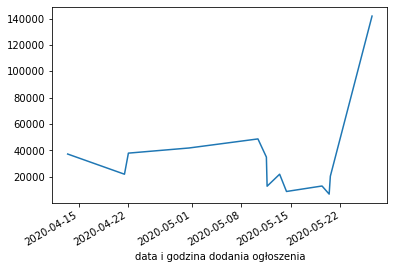

In [321]:
dataset.cena.plot()

Na osi X mamy wykreślone daty, których dotyczy dana cena.

Możemy zmienić częstotliwość danych poprzez operację zwaną [`resamplingiem` (przepróbkowaniem)](https://pl.wikipedia.org/wiki/Resampling). Dzięki tej operacji możemy albo agregować dane względem danych okresów. Gdybyśmy chcieli zbierać próbki z całego tygodnia możemy użyć metody [`resample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) w taki sposób

In [323]:
dataset.resample('W').mean().cena

data i godzina dodania ogłoszenia
2020-04-19     37314.0
2020-04-26     30000.0
2020-05-03     41900.0
2020-05-10     48780.0
2020-05-17     19700.0
2020-05-24     13350.0
2020-05-31    142000.0
Freq: W-SUN, Name: cena, dtype: float64

Poniżej znajdują się ogłoszenia posortowane według dat rosnąco

In [331]:
dataset.sort_index().head()

,marka,model,typ samochodu,rocznik,cena,powypadkowy
data i godzina dodania ogłoszenia,,,,,,
2020-04-13 11:11:00,renault,master,dostawczy,2016,37314,0
2020-04-21 11:54:00,skoda,octavia,osobowy,2014,22000,0
2020-04-22 01:12:00,audi,a4,osobowy,2008,38000,0
2020-04-30 14:52:00,mercedes-benz,klasa s 500,osobowy,2001,41900,0
2020-05-10 08:40:00,citroen,brak danych,dostawczy,2017,48780,0


Jako argument funkcji `resample` musimy podać okres do jakiego mają być agregowane dane. Zapisujemy go jako jedną literkę, podobnie jak w przypadku formatowania dat. Przykładowe oznaczenia:
   * Miesiąc - `M`
   * Tydzień - `W`
   * Dzień - `D`
   
Domyślnie agregacja `W` będzie zbierała dane z całego jednego tygodnia. Natomiast możemy dodać liczbę przed literką określająca ile tygodni ma być agregowanych razem. Gdybyśmy chcieli uzyskiwać dane co 2 tygodnie należałoby użyć resamplingu w taki sposób

In [319]:
dataset.resample('2W').mean().cena

data i godzina dodania ogłoszenia
2020-04-19    37314.000000
2020-05-03    33966.666667
2020-05-17    25516.000000
2020-05-31    39080.000000
Freq: 2W-SUN, Name: cena, dtype: float64

Więcej formatów jest dostępnych na stronie [pandas - data offset objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

Zadanie 2 (2 pkt.)

1. Wczytaj zbiór `sea_ice` ze strony [https://timeseries.weebly.com/data-sets.html](https://timeseries.weebly.com/data-sets.html).
2. Sprawdź typy danych, ustaw poprawne typy (kolumna `Time` powinna mieć typ `datetime64[ns]`, kolumny `Arctic` oraz `Antarctica` typ `float64`.
3. Odfiltruj dane tylko z lat 2001-2003.
4. Stwórz wykres na którym będą wyświetlane dane z Arktyki oraz Antarktyki w zależności od czasu (lata 2001-2003). Dodaj opisy osi oraz wykresu.

Zadanie 3 (3 pkt.)

1. Pobierz zbiór danych dotyczący temperatur ze strony [https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv), który zawiera minimalne wartości zanotowane Melbourne.
2. Ustaw poprawny typ dla dat, sprawdź, czy temperatury mają poprawny typ danych `float64`.
3. Narysuj wykres temperatur dodając opisy osi.
4. Resampluj dane, tak by były agregowane jako średnie dla każdego miesiąca.
5. Narysuj wykres temperatur ponownie.